<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [10]:
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [11]:
data_path = r'./quickdraw10.npz'

In [12]:
def load_quickdraw10(path):
    data = np.load(path)
    X = data['arr_0']
    y = data['arr_1']
    X_norm = X.astype('float32')/255
    y_norm = y.astype('float32')/255
    X_train, X_test, y_train, y_test = train_test_split(
        X_norm,
        y,
        test_size=0.20,
        shuffle=True,
        random_state=42)
    
    return X_train, y_train, X_test, y_test

In [15]:
X_train, y_train, X_test, y_test = load_quickdraw10(data_path)

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [16]:
def create_model(
    lr=0.01,
    opt=optimizers.SGD,
    act_func='relu',
    output_act_func='softmax',
    input_dim=784,
    neurons_per_layer=(32, 32, 10)):

    model = Sequential([
        Dense(neurons_per_layer[0], activation=act_func, input_dim=input_dim),
        Dense(neurons_per_layer[1], activation=act_func),
        Dense(neurons_per_layer[2], activation=output_act_func)
    ])

    model.compile(
        optimizer=opt(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [48]:
model = create_model()

bt_default = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1577 - accuracy: 0.6440 - val_loss: 0.8698 - val_accuracy: 0.7432
Epoch 2/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.8228 - accuracy: 0.7597 - val_loss: 0.7815 - val_accuracy: 0.7683
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7484 - accuracy: 0.7821 - val_loss: 0.7208 - val_accuracy: 0.7865
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6912 - accuracy: 0.7986 - val_loss: 0.6721 - val_accuracy: 0.8022
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6463 - accuracy: 0.8110 - val_loss: 0.6374 - val_accuracy: 0.8134
Epoch 6/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6125 - accuracy: 0.8208 - val_loss: 0.6135 - val_accuracy: 0.8184
Epoch 7/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5879 - accuracy: 0.8277 - val_loss: 0.5938 - val_accuracy:

In [52]:
model = create_model()

bt_sm = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=8,
    validation_data=(X_test, y_test)
)

Epoch 1/30
10000/10000 [==============================] - 19s 2ms/step - loss: 0.8585 - accuracy: 0.7402 - val_loss: 0.6553 - val_accuracy: 0.8042
Epoch 2/30
10000/10000 [==============================] - 18s 2ms/step - loss: 0.6224 - accuracy: 0.8148 - val_loss: 0.5916 - val_accuracy: 0.8203
Epoch 3/30
10000/10000 [==============================] - 18s 2ms/step - loss: 0.5620 - accuracy: 0.8316 - val_loss: 0.5742 - val_accuracy: 0.8256
Epoch 4/30
10000/10000 [==============================] - 18s 2ms/step - loss: 0.5298 - accuracy: 0.8411 - val_loss: 0.5420 - val_accuracy: 0.8345
Epoch 5/30
10000/10000 [==============================] - 18s 2ms/step - loss: 0.5060 - accuracy: 0.8479 - val_loss: 0.5514 - val_accuracy: 0.8310
Epoch 6/30
10000/10000 [==============================] - 19s 2ms/step - loss: 0.4892 - accuracy: 0.8518 - val_loss: 0.5315 - val_accuracy: 0.8396
Epoch 7/30
10000/10000 [==============================] - 19s 2ms/step - loss: 0.4748 - accuracy: 0.8570 - val_loss: 0

In [51]:
model = create_model()

bt_med = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=15,
    validation_data=(X_test, y_test)
)

Epoch 1/30
5334/5334 [==============================] - 12s 2ms/step - loss: 0.9573 - accuracy: 0.7082 - val_loss: 0.7591 - val_accuracy: 0.7768
Epoch 2/30
5334/5334 [==============================] - 11s 2ms/step - loss: 0.7013 - accuracy: 0.7925 - val_loss: 0.6622 - val_accuracy: 0.8033
Epoch 3/30
5334/5334 [==============================] - 11s 2ms/step - loss: 0.6283 - accuracy: 0.8135 - val_loss: 0.6235 - val_accuracy: 0.8133
Epoch 4/30
5334/5334 [==============================] - 11s 2ms/step - loss: 0.5810 - accuracy: 0.8262 - val_loss: 0.5851 - val_accuracy: 0.8244
Epoch 5/30
5334/5334 [==============================] - 11s 2ms/step - loss: 0.5521 - accuracy: 0.8346 - val_loss: 0.5724 - val_accuracy: 0.8306
Epoch 6/30
5334/5334 [==============================] - 11s 2ms/step - loss: 0.5314 - accuracy: 0.8409 - val_loss: 0.5663 - val_accuracy: 0.8286
Epoch 7/30
5334/5334 [==============================] - 11s 2ms/step - loss: 0.5154 - accuracy: 0.8465 - val_loss: 0.5557 - val_ac

In [50]:
model = create_model()

bt_lrg = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=250,
    validation_data=(X_test, y_test)
)

Epoch 1/30
320/320 [==============================] - 1s 3ms/step - loss: 1.9292 - accuracy: 0.3347 - val_loss: 1.5463 - val_accuracy: 0.5356
Epoch 2/30
320/320 [==============================] - 1s 2ms/step - loss: 1.3363 - accuracy: 0.5909 - val_loss: 1.2054 - val_accuracy: 0.6276
Epoch 3/30
320/320 [==============================] - 1s 2ms/step - loss: 1.1343 - accuracy: 0.6515 - val_loss: 1.0772 - val_accuracy: 0.6675
Epoch 4/30
320/320 [==============================] - 1s 2ms/step - loss: 1.0358 - accuracy: 0.6864 - val_loss: 0.9975 - val_accuracy: 0.6999
Epoch 5/30
320/320 [==============================] - 1s 2ms/step - loss: 0.9692 - accuracy: 0.7117 - val_loss: 0.9407 - val_accuracy: 0.7231
Epoch 6/30
320/320 [==============================] - 1s 2ms/step - loss: 0.9210 - accuracy: 0.7298 - val_loss: 0.8993 - val_accuracy: 0.7378
Epoch 7/30
320/320 [==============================] - 1s 2ms/step - loss: 0.8858 - accuracy: 0.7418 - val_loss: 0.8701 - val_accuracy: 0.7468
Epoch 

In [49]:
model = create_model()

bt_xl = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=520,
    validation_data=(X_test, y_test)
)

Epoch 1/30
154/154 [==============================] - 1s 4ms/step - loss: 2.1342 - accuracy: 0.2834 - val_loss: 1.9317 - val_accuracy: 0.3868
Epoch 2/30
154/154 [==============================] - 0s 3ms/step - loss: 1.7374 - accuracy: 0.4569 - val_loss: 1.5699 - val_accuracy: 0.5232
Epoch 3/30
154/154 [==============================] - 0s 3ms/step - loss: 1.4455 - accuracy: 0.5639 - val_loss: 1.3402 - val_accuracy: 0.5979
Epoch 4/30
154/154 [==============================] - 0s 3ms/step - loss: 1.2657 - accuracy: 0.6185 - val_loss: 1.2005 - val_accuracy: 0.6377
Epoch 5/30
154/154 [==============================] - 0s 3ms/step - loss: 1.1564 - accuracy: 0.6514 - val_loss: 1.1141 - val_accuracy: 0.6642
Epoch 6/30
154/154 [==============================] - 0s 3ms/step - loss: 1.0851 - accuracy: 0.6735 - val_loss: 1.0552 - val_accuracy: 0.6803
Epoch 7/30
154/154 [==============================] - 0s 3ms/step - loss: 1.0340 - accuracy: 0.6891 - val_loss: 1.0106 - val_accuracy: 0.6980
Epoch 

In [59]:
model = create_model()

bt_curious = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=25,
    validation_data=(X_test, y_test)
)

Epoch 1/30
3200/3200 [==============================] - 6s 2ms/step - loss: 1.0923 - accuracy: 0.6651 - val_loss: 0.8248 - val_accuracy: 0.7595
Epoch 2/30
3200/3200 [==============================] - 6s 2ms/step - loss: 0.7680 - accuracy: 0.7764 - val_loss: 0.7194 - val_accuracy: 0.7916
Epoch 3/30
3200/3200 [==============================] - 6s 2ms/step - loss: 0.6894 - accuracy: 0.7980 - val_loss: 0.6703 - val_accuracy: 0.8015
Epoch 4/30
3200/3200 [==============================] - 6s 2ms/step - loss: 0.6404 - accuracy: 0.8113 - val_loss: 0.6324 - val_accuracy: 0.8131
Epoch 5/30
3200/3200 [==============================] - 6s 2ms/step - loss: 0.6065 - accuracy: 0.8207 - val_loss: 0.6120 - val_accuracy: 0.8182
Epoch 6/30
3200/3200 [==============================] - 6s 2ms/step - loss: 0.5803 - accuracy: 0.8283 - val_loss: 0.5883 - val_accuracy: 0.8271
Epoch 7/30
3200/3200 [==============================] - 6s 2ms/step - loss: 0.5588 - accuracy: 0.8345 - val_loss: 0.5796 - val_accuracy:

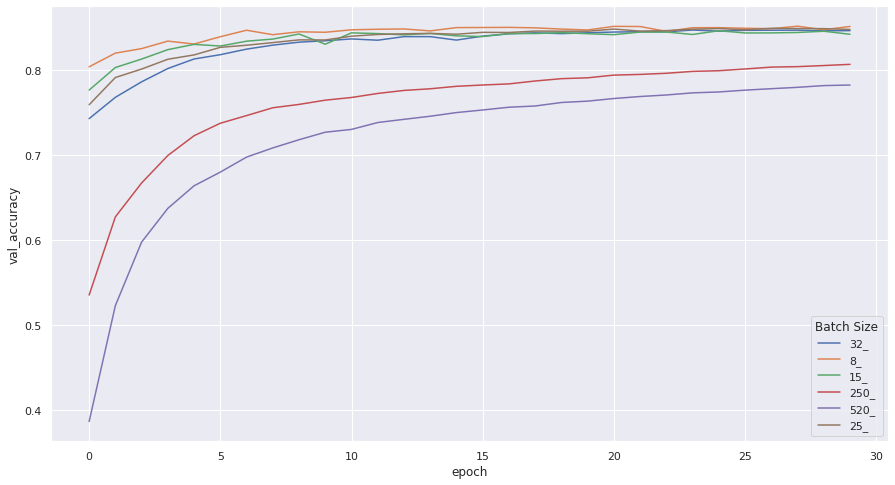

In [61]:
batch_sizes = []
for exp, result in zip([bt_default,
                        bt_sm,
                        bt_med,
                        bt_lrg,
                        bt_xl,
                        bt_curious],
                       ["32_", "8_", "15_", "250_", "520_", "25_"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Batch Size'] = result
    batch_sizes.append(df)
df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

sns.set(rc={'figure.figsize':(15,8)})
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df)

## **Batch Size Analysis:**

- **The best model was the one with `bt_curious` batch size of `25`. Out of all the epochs that model seemed to be the most consitant and smoothly increase its accuracy.**

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [62]:
model = create_model()

bt_default = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=25,
    validation_data=(X_test, y_test)
)

Epoch 1/30
3200/3200 [==============================] - 6s 2ms/step - loss: 1.1205 - accuracy: 0.6546 - val_loss: 0.8546 - val_accuracy: 0.7522
Epoch 2/30
3200/3200 [==============================] - 6s 2ms/step - loss: 0.7963 - accuracy: 0.7677 - val_loss: 0.7464 - val_accuracy: 0.7846
Epoch 3/30
3200/3200 [==============================] - 6s 2ms/step - loss: 0.7121 - accuracy: 0.7923 - val_loss: 0.7008 - val_accuracy: 0.7943
Epoch 4/30
3200/3200 [==============================] - 6s 2ms/step - loss: 0.6581 - accuracy: 0.8080 - val_loss: 0.6587 - val_accuracy: 0.8060
Epoch 5/30
3200/3200 [==============================] - 6s 2ms/step - loss: 0.6191 - accuracy: 0.8176 - val_loss: 0.6157 - val_accuracy: 0.8169
Epoch 6/30
3200/3200 [==============================] - 6s 2ms/step - loss: 0.5896 - accuracy: 0.8265 - val_loss: 0.5994 - val_accuracy: 0.8227
Epoch 7/30
3200/3200 [==============================] - 6s 2ms/step - loss: 0.5661 - accuracy: 0.8328 - val_loss: 0.5861 - val_accuracy:

In [63]:
model = create_model(lr=0.0001)

lr_sm = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=25,
    validation_data=(X_test, y_test)
)

Epoch 1/30
3200/3200 [==============================] - 6s 2ms/step - loss: 2.2931 - accuracy: 0.1604 - val_loss: 2.2439 - val_accuracy: 0.1942
Epoch 2/30
3200/3200 [==============================] - 6s 2ms/step - loss: 2.2102 - accuracy: 0.2198 - val_loss: 2.1710 - val_accuracy: 0.2461
Epoch 3/30
3200/3200 [==============================] - 6s 2ms/step - loss: 2.1352 - accuracy: 0.2721 - val_loss: 2.0911 - val_accuracy: 0.3054
Epoch 4/30
3200/3200 [==============================] - 6s 2ms/step - loss: 2.0468 - accuracy: 0.3389 - val_loss: 1.9943 - val_accuracy: 0.3756
Epoch 5/30
3200/3200 [==============================] - 6s 2ms/step - loss: 1.9423 - accuracy: 0.4059 - val_loss: 1.8860 - val_accuracy: 0.4349
Epoch 6/30
3200/3200 [==============================] - 6s 2ms/step - loss: 1.8332 - accuracy: 0.4540 - val_loss: 1.7780 - val_accuracy: 0.4758
Epoch 7/30
3200/3200 [==============================] - 6s 2ms/step - loss: 1.7276 - accuracy: 0.4877 - val_loss: 1.6757 - val_accuracy:

In [64]:
model = create_model(lr=0.001)

lr_md = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=25,
    validation_data=(X_test, y_test)
)

Epoch 1/30
3200/3200 [==============================] - 6s 2ms/step - loss: 1.9614 - accuracy: 0.3200 - val_loss: 1.6108 - val_accuracy: 0.5107
Epoch 2/30
3200/3200 [==============================] - 6s 2ms/step - loss: 1.3416 - accuracy: 0.5996 - val_loss: 1.1665 - val_accuracy: 0.6525
Epoch 3/30
3200/3200 [==============================] - 6s 2ms/step - loss: 1.0872 - accuracy: 0.6705 - val_loss: 1.0246 - val_accuracy: 0.6930
Epoch 4/30
3200/3200 [==============================] - 6s 2ms/step - loss: 0.9877 - accuracy: 0.7033 - val_loss: 0.9551 - val_accuracy: 0.7171
Epoch 5/30
3200/3200 [==============================] - 6s 2ms/step - loss: 0.9328 - accuracy: 0.7210 - val_loss: 0.9132 - val_accuracy: 0.7311
Epoch 6/30
3200/3200 [==============================] - 6s 2ms/step - loss: 0.8968 - accuracy: 0.7347 - val_loss: 0.8823 - val_accuracy: 0.7409
Epoch 7/30
3200/3200 [==============================] - 6s 2ms/step - loss: 0.8703 - accuracy: 0.7443 - val_loss: 0.8600 - val_accuracy:

In [65]:
model = create_model(lr=0.1)

lr_lrg = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=25,
    validation_data=(X_test, y_test)
)

Epoch 1/30
3200/3200 [==============================] - 6s 2ms/step - loss: 0.7585 - accuracy: 0.7674 - val_loss: 0.6368 - val_accuracy: 0.8030
Epoch 2/30
3200/3200 [==============================] - 6s 2ms/step - loss: 0.5788 - accuracy: 0.8233 - val_loss: 0.5567 - val_accuracy: 0.8286
Epoch 3/30
3200/3200 [==============================] - 6s 2ms/step - loss: 0.5338 - accuracy: 0.8373 - val_loss: 0.5386 - val_accuracy: 0.8363
Epoch 4/30
3200/3200 [==============================] - 6s 2ms/step - loss: 0.5082 - accuracy: 0.8438 - val_loss: 0.5212 - val_accuracy: 0.8389
Epoch 5/30
3200/3200 [==============================] - 7s 2ms/step - loss: 0.4892 - accuracy: 0.8500 - val_loss: 0.5230 - val_accuracy: 0.8393
Epoch 6/30
3200/3200 [==============================] - 7s 2ms/step - loss: 0.4752 - accuracy: 0.8541 - val_loss: 0.5240 - val_accuracy: 0.8377
Epoch 7/30
3200/3200 [==============================] - 6s 2ms/step - loss: 0.4623 - accuracy: 0.8572 - val_loss: 0.5198 - val_accuracy:

In [66]:
model = create_model(lr=1)

lr_xl = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=25,
    validation_data=(X_test, y_test)
)

Epoch 1/30
3200/3200 [==============================] - 6s 2ms/step - loss: 1.8610 - accuracy: 0.2914 - val_loss: 1.6066 - val_accuracy: 0.4065
Epoch 2/30
3200/3200 [==============================] - 6s 2ms/step - loss: 1.9219 - accuracy: 0.2494 - val_loss: 1.9633 - val_accuracy: 0.1807
Epoch 3/30
3200/3200 [==============================] - 6s 2ms/step - loss: 1.9968 - accuracy: 0.1827 - val_loss: 1.9645 - val_accuracy: 0.1893
Epoch 4/30
3200/3200 [==============================] - 6s 2ms/step - loss: 1.9884 - accuracy: 0.1808 - val_loss: 1.9534 - val_accuracy: 0.1907
Epoch 5/30
3200/3200 [==============================] - 6s 2ms/step - loss: 1.9865 - accuracy: 0.1843 - val_loss: 1.9672 - val_accuracy: 0.1786
Epoch 6/30
3200/3200 [==============================] - 6s 2ms/step - loss: 1.9841 - accuracy: 0.1870 - val_loss: 1.9393 - val_accuracy: 0.2333
Epoch 7/30
3200/3200 [==============================] - 7s 2ms/step - loss: 1.9726 - accuracy: 0.1876 - val_loss: 1.9723 - val_accuracy:

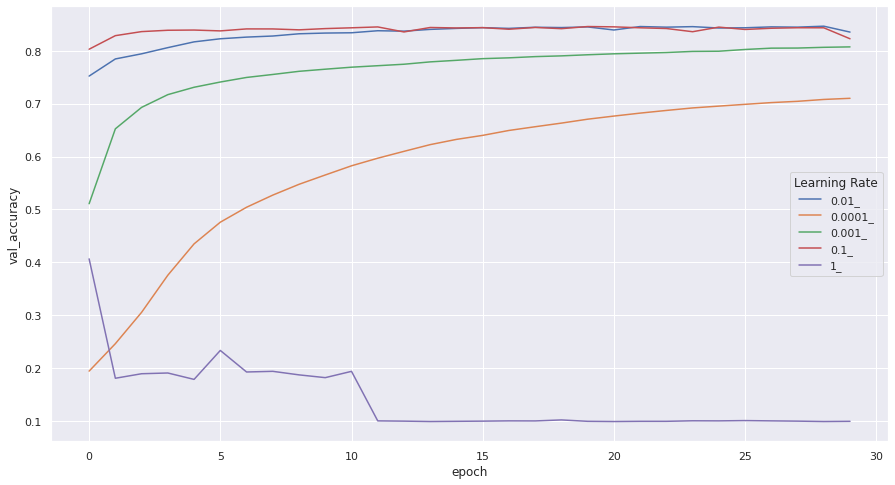

In [69]:
batch_sizes = []
for exp, result in zip([bt_default,
                        lr_sm,
                        lr_md,
                        lr_lrg,
                        lr_xl,],
                       ["0.01_", "0.0001_",
                        "0.001_", "0.1_", "1_"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Learning Rate'] = result
    batch_sizes.append(df)
df = pd.concat(batch_sizes)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

sns.set(rc={'figure.figsize':(15,8)})
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df)


### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [24]:
model = create_model()

op_default = model.fit(
    X_train, y_train,
    epochs=27,
    batch_size=25,
    validation_data=(X_test, y_test)
)

Epoch 1/27
3200/3200 [==============================] - 7s 2ms/step - loss: 1.1158 - accuracy: 0.6574 - val_loss: 0.8189 - val_accuracy: 0.7577
Epoch 2/27
3200/3200 [==============================] - 6s 2ms/step - loss: 0.7720 - accuracy: 0.7732 - val_loss: 0.7323 - val_accuracy: 0.7879
Epoch 3/27
3200/3200 [==============================] - 6s 2ms/step - loss: 0.6968 - accuracy: 0.7964 - val_loss: 0.6779 - val_accuracy: 0.8009
Epoch 4/27
3200/3200 [==============================] - 7s 2ms/step - loss: 0.6480 - accuracy: 0.8097 - val_loss: 0.6375 - val_accuracy: 0.8113
Epoch 5/27
3200/3200 [==============================] - 6s 2ms/step - loss: 0.6134 - accuracy: 0.8182 - val_loss: 0.6227 - val_accuracy: 0.8145
Epoch 6/27
3200/3200 [==============================] - 7s 2ms/step - loss: 0.5865 - accuracy: 0.8255 - val_loss: 0.6021 - val_accuracy: 0.8201
Epoch 7/27
3200/3200 [==============================] - 8s 2ms/step - loss: 0.5651 - accuracy: 0.8324 - val_loss: 0.5793 - val_accuracy:

In [25]:
model = create_model(opt=optimizers.Adam)

op_adam = model.fit(
    X_train, y_train,
    epochs=27,
    batch_size=25,
    validation_data=(X_test, y_test)
)

Epoch 1/27
3200/3200 [==============================] - 7s 2ms/step - loss: 0.7731 - accuracy: 0.7649 - val_loss: 0.7471 - val_accuracy: 0.7818
Epoch 2/27
3200/3200 [==============================] - 7s 2ms/step - loss: 0.6670 - accuracy: 0.8006 - val_loss: 0.6788 - val_accuracy: 0.8019
Epoch 3/27
3200/3200 [==============================] - 7s 2ms/step - loss: 0.6406 - accuracy: 0.8094 - val_loss: 0.6736 - val_accuracy: 0.7993
Epoch 4/27
3200/3200 [==============================] - 7s 2ms/step - loss: 0.6221 - accuracy: 0.8161 - val_loss: 0.6436 - val_accuracy: 0.8076
Epoch 5/27
3200/3200 [==============================] - 7s 2ms/step - loss: 0.6069 - accuracy: 0.8209 - val_loss: 0.6321 - val_accuracy: 0.8192
Epoch 6/27
3200/3200 [==============================] - 7s 2ms/step - loss: 0.5964 - accuracy: 0.8227 - val_loss: 0.6437 - val_accuracy: 0.8137
Epoch 7/27
3200/3200 [==============================] - 7s 2ms/step - loss: 0.5917 - accuracy: 0.8266 - val_loss: 0.6290 - val_accuracy:

In [26]:
model = create_model(opt=optimizers.Adamax)

op_adamax = model.fit(
    X_train, y_train,
    epochs=27,
    batch_size=25,
    validation_data=(X_test, y_test)
)

Epoch 1/27
3200/3200 [==============================] - 7s 2ms/step - loss: 0.7177 - accuracy: 0.7823 - val_loss: 0.6084 - val_accuracy: 0.8144
Epoch 2/27
3200/3200 [==============================] - 7s 2ms/step - loss: 0.5660 - accuracy: 0.8295 - val_loss: 0.5453 - val_accuracy: 0.8347
Epoch 3/27
3200/3200 [==============================] - 7s 2ms/step - loss: 0.5293 - accuracy: 0.8400 - val_loss: 0.5297 - val_accuracy: 0.8361
Epoch 4/27
3200/3200 [==============================] - 7s 2ms/step - loss: 0.5033 - accuracy: 0.8483 - val_loss: 0.5396 - val_accuracy: 0.8376
Epoch 5/27
3200/3200 [==============================] - 7s 2ms/step - loss: 0.4873 - accuracy: 0.8515 - val_loss: 0.5155 - val_accuracy: 0.8439
Epoch 6/27
3200/3200 [==============================] - 7s 2ms/step - loss: 0.4727 - accuracy: 0.8564 - val_loss: 0.5151 - val_accuracy: 0.8472
Epoch 7/27
3200/3200 [==============================] - 7s 2ms/step - loss: 0.4622 - accuracy: 0.8603 - val_loss: 0.5153 - val_accuracy:

In [23]:
model = create_model(opt=optimizers.Ftrl)

op_ftrl = model.fit(
    X_train, y_train,
    epochs=27,
    batch_size=25,
    validation_data=(X_test, y_test)
)

Epoch 1/27
3200/3200 [==============================] - 7s 2ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.0988
Epoch 2/27
3200/3200 [==============================] - 7s 2ms/step - loss: 2.3026 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.0988
Epoch 3/27
3200/3200 [==============================] - 7s 2ms/step - loss: 2.3026 - accuracy: 0.0983 - val_loss: 2.3024 - val_accuracy: 0.0992
Epoch 4/27
3200/3200 [==============================] - 7s 2ms/step - loss: 2.0187 - accuracy: 0.2199 - val_loss: 1.7124 - val_accuracy: 0.3345
Epoch 5/27
3200/3200 [==============================] - 6s 2ms/step - loss: 1.4533 - accuracy: 0.4409 - val_loss: 1.2669 - val_accuracy: 0.5481
Epoch 6/27
3200/3200 [==============================] - 7s 2ms/step - loss: 1.1559 - accuracy: 0.6062 - val_loss: 1.0602 - val_accuracy: 0.6615
Epoch 7/27
3200/3200 [==============================] - 7s 2ms/step - loss: 1.0019 - accuracy: 0.6995 - val_loss: 0.9426 - val_accuracy:

In [22]:
model = create_model(opt=optimizers.Adagrad)

op_adagrad = model.fit(
    X_train, y_train,
    epochs=27,
    batch_size=25,
    validation_data=(X_test, y_test)
)

Epoch 1/27
3200/3200 [==============================] - 7s 2ms/step - loss: 0.9143 - accuracy: 0.7288 - val_loss: 0.7401 - val_accuracy: 0.7850
Epoch 2/27
3200/3200 [==============================] - 6s 2ms/step - loss: 0.7074 - accuracy: 0.7956 - val_loss: 0.6827 - val_accuracy: 0.8024
Epoch 3/27
3200/3200 [==============================] - 7s 2ms/step - loss: 0.6585 - accuracy: 0.8088 - val_loss: 0.6552 - val_accuracy: 0.8109
Epoch 4/27
3200/3200 [==============================] - 7s 2ms/step - loss: 0.6303 - accuracy: 0.8168 - val_loss: 0.6336 - val_accuracy: 0.8149
Epoch 5/27
3200/3200 [==============================] - 6s 2ms/step - loss: 0.6093 - accuracy: 0.8217 - val_loss: 0.6190 - val_accuracy: 0.8195
Epoch 6/27
3200/3200 [==============================] - 6s 2ms/step - loss: 0.5928 - accuracy: 0.8264 - val_loss: 0.6089 - val_accuracy: 0.8216
Epoch 7/27
3200/3200 [==============================] - 6s 2ms/step - loss: 0.5795 - accuracy: 0.8305 - val_loss: 0.5986 - val_accuracy:

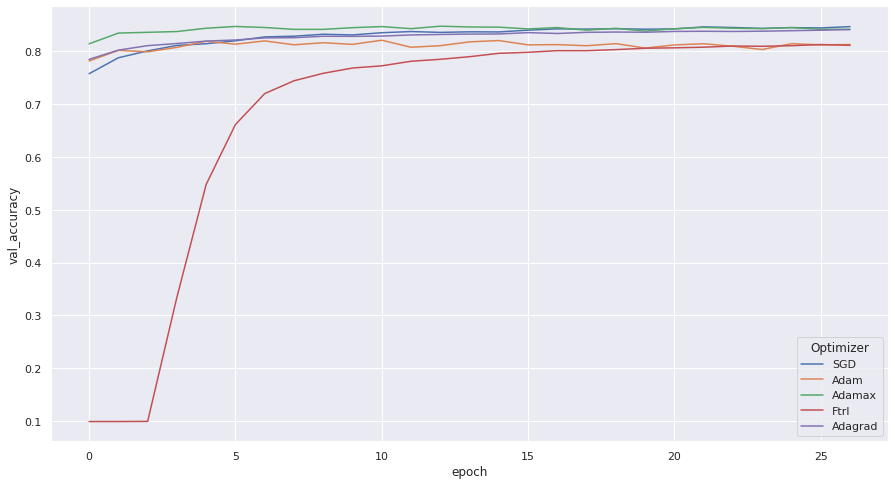

In [27]:
batch_sizes = []
for exp, result in zip([op_default,
                        op_adam,
                        op_adamax,
                        op_ftrl,
                        op_adagrad,],
                       ["SGD", "Adam",
                        "Adamax", "Ftrl", "Adagrad"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Optimizer'] = result
    batch_sizes.append(df)
df = pd.concat(batch_sizes)
df['Optimizer'] = df['Optimizer'].astype('str')
df.head()

sns.set(rc={'figure.figsize':(15,8)})
sns.lineplot(x='epoch', y='val_accuracy', hue='Optimizer', data=df)

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
What you take is the result the neural network ended up with, and the result you want. From this you calculate an error. You then use that error to go adjust the weights in the neural network.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


